<a href="https://colab.research.google.com/github/hawk-in-cloud/Machine-Learning---Manifold-Learning/blob/main/ManifoldLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 机器学习 - Manifold Learning学习笔记

- 意义

虽然PCA在线性降维做的很好，但是无法处理非线性数据集降维的情况，因此推出流形学习概念：将多维度数据集展开成一个二维曲面

        - A.I 人工智慧 - 機器學習 - 課程 18－machine learning- Manifold Learning 流形學習

- 參考文獻
    
    - https://scikit-learn.org/stable/modules/manifold.html
    - https://en.wikipedia.org/wiki/Manifold
    - https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction

# 舉個例子

- 流形學習 Manifold Learning

    - PCA的 一個弱點
         - 無法檢測 到 非線性特徵
    
- * Manifold Learning *的 演算法
     - 來解決這個問題這種不足

- Manifold學習中使用的規範數據集是
   - S-curve

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

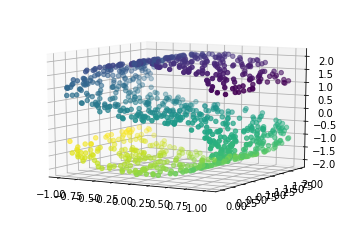

In [ ]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60);

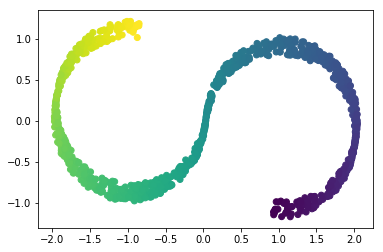

In [ ]:
# 使用 PCA 将数据集降维成 2 维
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

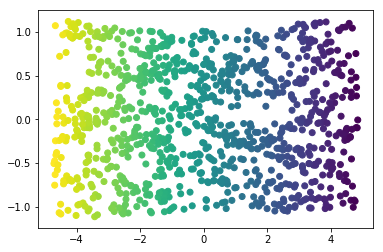

In [ ]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y);

## 程式範例 1 - 手写数字数据集降维

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

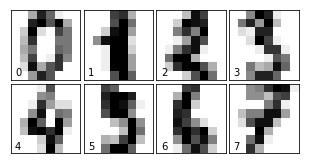

In [ ]:
# 從  sklearn 載入 datasets
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 digits
digits = datasets.load_digits()

# 設定圖形的大小（寬 , 高）
fig = plt.figure(figsize=(4, 2))

# 調整子圖形
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 把前 8 個手寫數字顯示在子圖形
for i in range(8):
    # 在 2 x 4 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

# 顯示圖形
plt.show()

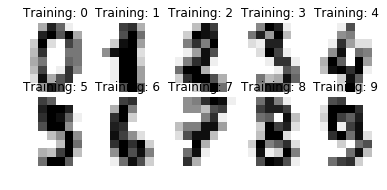

In [ ]:
# 載入 digits
digits = datasets.load_digits()

# 設定圖形的大小（寬, 高）
fig = plt.figure(figsize=(5, 2))

# 調整子圖形
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 將觀測值與目標值放入一個 list
images_and_labels = list(zip(digits.images, digits.target))

# list 中的每個元素
for i, (image, label) in enumerate(images_and_labels[:10]):
    # 在 i + 1 的位置初始化子圖形
    plt.subplot(2, 5, i + 1)
    # 關掉子圖形座標軸刻度
    plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))

# 顯示圖形
plt.show()

In [ ]:
digits.data.shape

## 结果如下，现在是64维

(1797, 64)

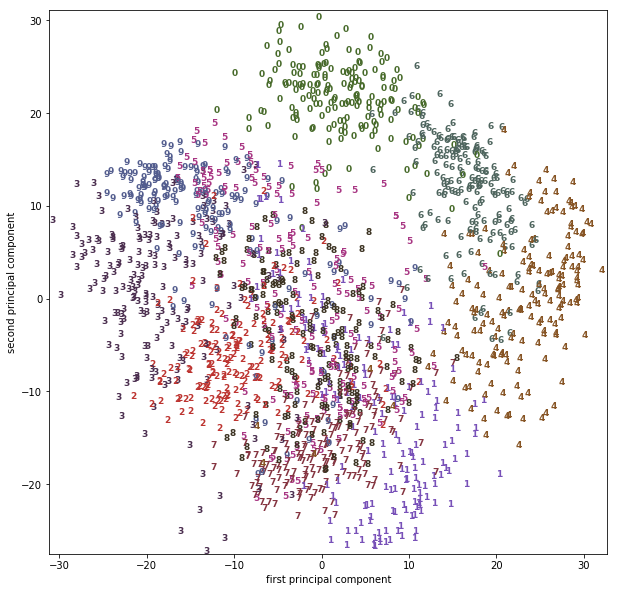

In [ ]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max() + 1)
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component");

In [ ]:
digits_pca.shape

## 已经降维成2维

(1797, 2)

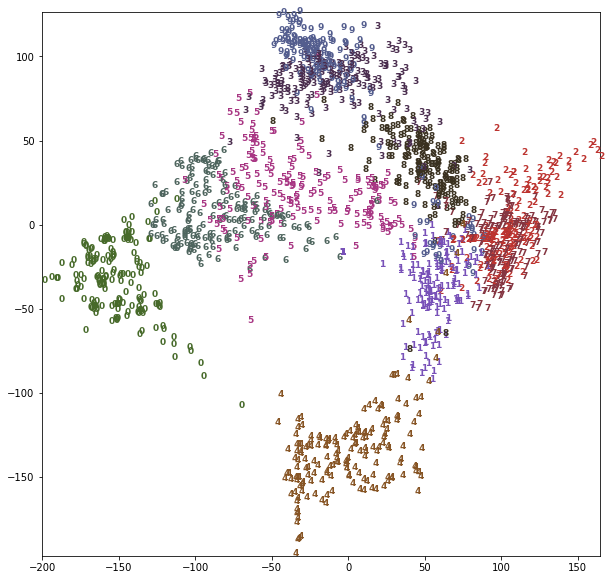

In [ ]:
# 使用Isomap进行降维，可以发现分类更加明确，聚类效果更加明显

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
digits_isomap = iso.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_isomap[:, 0].min(), digits_isomap[:, 0].max() + 1)
plt.ylim(digits_isomap[:, 1].min(), digits_isomap[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_isomap[i, 0], digits_isomap[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

In [ ]:
# 使用TSNE进行降维，可以发现分聚类效果显著提升
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)

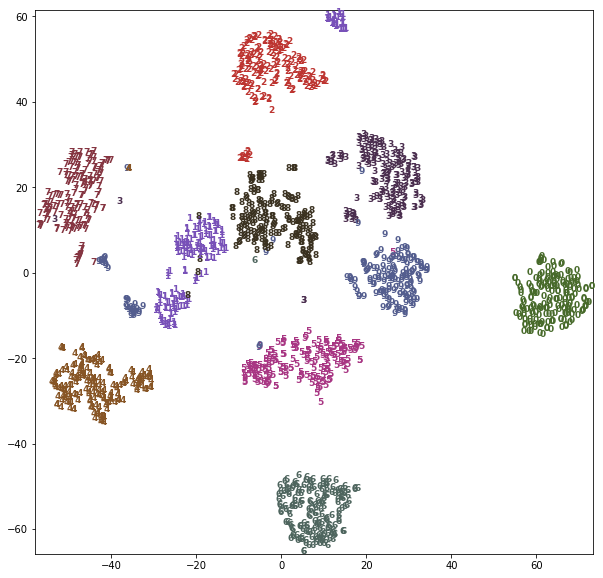

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

# 程式範例 2 - Hello

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
#自行建立一个数据集：包括1000个点，这些点是"Hello"字形的呈现

def make_hello(N=2000, rseed=42):
    # 创建一个关于"Hello"字体的绘图，并将其存为png格式
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    # 打开这个 png 图片，并选取若干位于该图片上的随机点（此处选取 N 个点）
    from matplotlib.image import imread
    data = imread('data/hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

<ipython-input-13-8142bfdc0d8d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # rainbow
<ipython-input-13-8142bfdc0d8d>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # rainbow


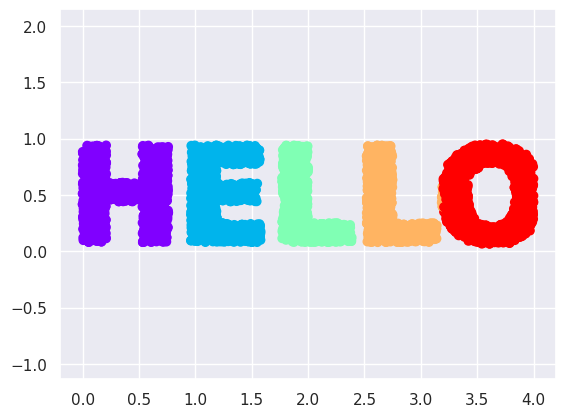

In [ ]:
# 选取图片上的5000个点作为数据集
X = make_hello(5000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # rainbow
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

- from sklearn.metrics import pairwise_distances
    
    - sklearn.metrics.pairwise_distances

    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

<ipython-input-14-5b7ef44ed9a1>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # rainbow


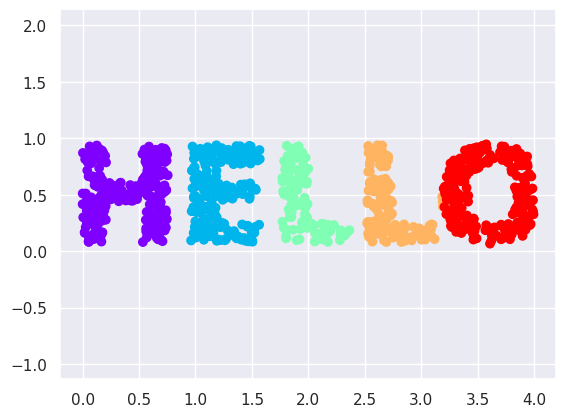

In [ ]:
# 选取图片上的1000个随机点作为数据集，拟和度降低
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # rainbow
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [ ]:
# 查看数据集，1000个点，1000维度
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

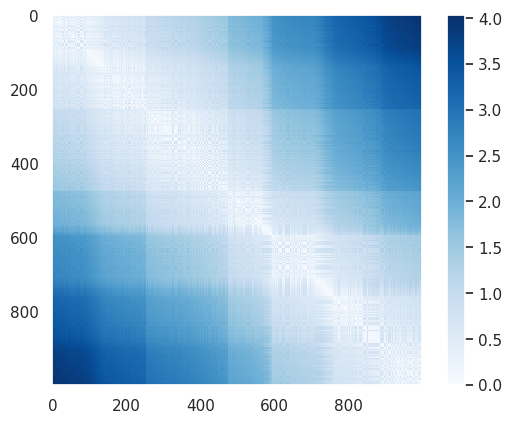

In [ ]:
# 数据集的距离分布图
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

- 多維縮放 Multidimensional scaling MDS
多維縮放

    - sklearn.manifold.MDS

    - from sklearn.manifold import MDS

    - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

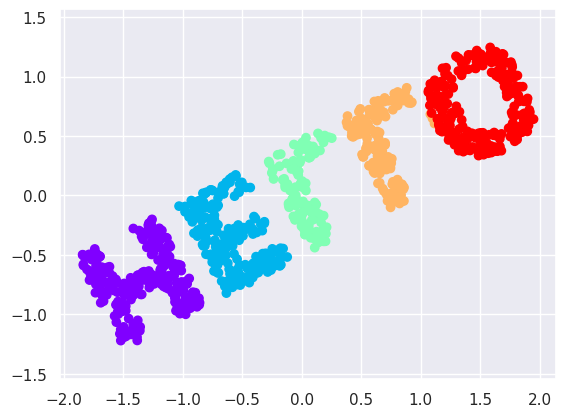

In [ ]:
# MDS 多维缩放，使用MDS算法将维度降至2维
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [ ]:
# 再将数据集升维为3维
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

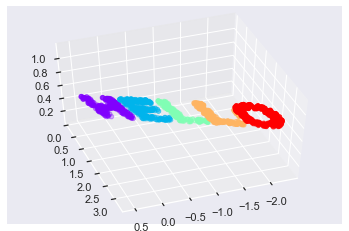

In [ ]:
# 绘制数据集 ，此处由于是线性投影变换，所以数据集形状无变化
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

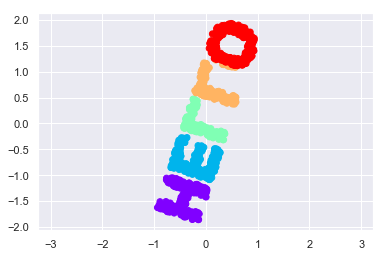

In [ ]:
# 使用MDS重新降维为2维
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

In [ ]:
# 绘制数据集 ，此处由于是非线性手动构造的S曲线,所以变化的3维数据集偏离原图案
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

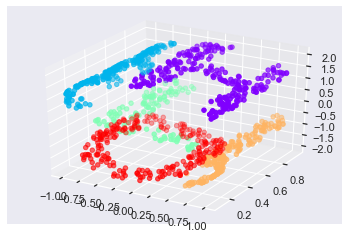

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

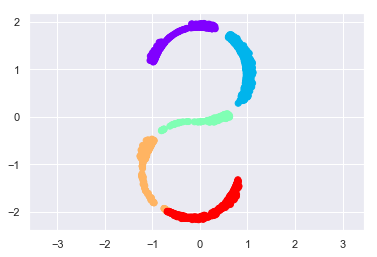

In [ ]:
# 再用MDS算法将该数据集降维为2维，由上可知，由于我们构造了S形非线性变换，所以再次降2维后图案为S形
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

- 局部線性嵌入 Locally Linear Embedding

    - sklearn.manifold.LocallyLinearEmbedding

    - from sklearn.manifold import LocallyLinearEmbedding

    - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

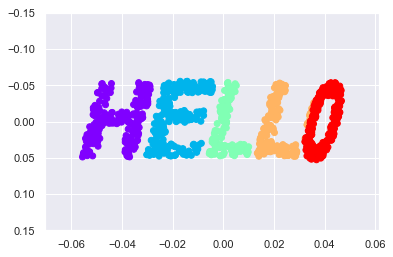

In [ ]:
# 使用LLS算法进行降维
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# 程式範例 3 - 人脸图片数据集降维（按直方图）

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

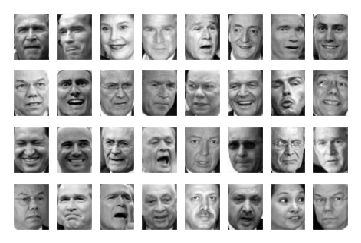

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

- 繪製 2,914 Dimensiona維 數據的低維嵌入
- 以了解圖像之間的基本關係

- 開始方法 是計算PCA
    - 並檢查/解釋 方差

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

- offsetbox

    - matplotlib.offsetbox

    - from matplotlib import offsetbox
    
    - https://matplotlib.org/api/offsetbox_api.html

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Wall time: 37.8 s


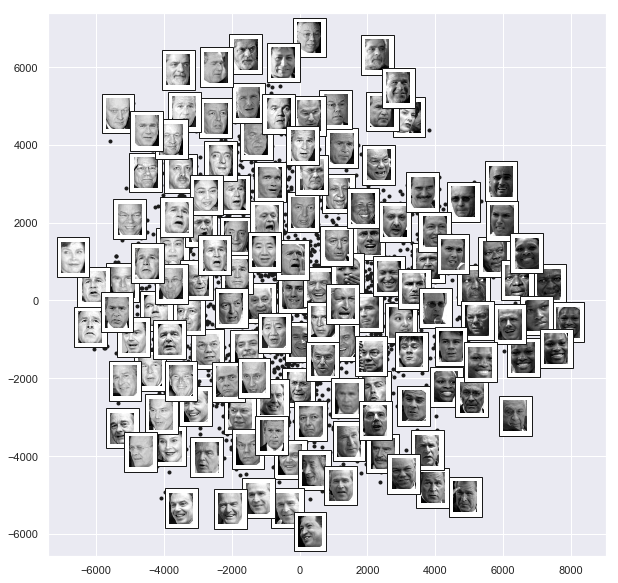

In [ ]:
%%time

fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])